# Анализ Бизнес-Показателей для приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Цель:** разобраться в причинах и помочь компании выйти в плюс.

**В ходе работы необходимо изучить:**
+ откуда приходят пользователи и какими устройствами они пользуются,
+ сколько стоит привлечение пользователей из различных рекламных каналов;
+ сколько денег приносит каждый клиент,
+ когда расходы на привлечение клиента окупаются,
+ какие факторы мешают привлечению клиентов.

**Структура исходных данных:**

Структура `visits_info_short.csv`:

+ User Id — уникальный идентификатор пользователя,
+ Region — страна пользователя,
+ Device — тип устройства пользователя,
+ Channel — идентификатор источника перехода,
+ Session Start — дата и время начала сессии,
+ Session End — дата и время окончания сессии.

Структура `orders_info_short.csv`:

+ User Id — уникальный идентификатор пользователя,
+ Event Dt — дата и время покупки,
+ Revenue — сумма заказа.

Структура `costs_info_short.csv`:

+ dt — дата проведения рекламной кампании,
+ Channel — идентификатор рекламного источника,
+ costs — расходы на эту кампанию.

______


### Загрузка данных и подготовка их к анализу

На данном этапы мы выгрузим информацию о файлах в переменные и сделаем предобработку. Для этого необходимо выполнить несколько пунктов:

+ с помощью методов head() и info() выяснить, нормально ли выгрузили данные и какого типа эти данные
+ преобразовать тип данных при необходимости
+ выявить наличие пропусков и дубликатов.

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from datetime import date, timedelta

In [2]:
# загрузим в переменные данные о визитах, заказах и рекламных расходах
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
# приведём все названия колонок к змеиному регистру
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

Теперь можно рассматривать сами данные

In [4]:
# посмотрим первые строки каждого датафрейма
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [7]:
# вызовем метод info()

print('Информация о визиках:')
visits.info()
print('')
print('Информация о заказах:')
orders.info()
print('')
print('Информация о рекламных расходах:')
costs.info()

Информация о визиках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Информация о заказах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Информация о рекламных расходах:
<class 'pandas.core.frame.DataFrame'>
Ran

In [8]:
# преобразуем типы данных в datetime64
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Теперь посмотрим наличие пропусков и дубликатов

In [9]:
# выявим явные дубликаты

print('Количество дубликатов в визиках:')
print(visits.duplicated().sum())
print('Количество дубликатов в заказах:')
print(orders.duplicated().sum())
print('Количество дубликатов в рекламных расходах:')
print(costs.duplicated().sum())

Количество дубликатов в визиках:
0
Количество дубликатов в заказах:
0
Количество дубликатов в рекламных расходах:
0


In [10]:
# выявим явные дубликаты

print('Пропуски в визиках:')
print(visits.isna().sum())
print('')
print('Пропуски в заказах:')
print(orders.isna().sum())
print('')
print('Пропуски в рекламных расходах:')
print(costs.isna().sum())

Пропуски в визиках:
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропуски в заказах:
user_id     0
event_dt    0
revenue     0
dtype: int64

Пропуски в рекламных расходах:
dt         0
channel    0
costs      0
dtype: int64


<div style="border:solid green 2px; padding: 20px">
    
        Итак, мы преобразовали необходимые форматы данных и убедились, что в данных нет 
    пропусков и дубликатов.
    
</div>

____

### Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Для вычисления Бизнес-показателей могут пригодится следующие функции (из теоретических уроков):

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<div style="border:solid green 2px; padding: 20px">
    
        Были добавлены все необходимые функции для последующего анализа данных.
    
</div>

___

### Исследовательский анализ данных

На данном этапе будет сделано следующее:
- Составлены профили пользователей. Опредёны минимальная и максимальная даты привлечения пользователей.
- Выяснено, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построена таблица, отражающая количество пользователей и долю платящих из каждой страны.
- Узнано, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построена таблица, отражающая количество пользователей и долю платящих для каждого устройства.
- Изучены рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построена таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения.


In [19]:
# вызовем функцию и найдём минимальную и максимальную даты
profiles = get_profiles(visits, orders, costs)
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [20]:
print('Минимальная дата привлечения пользователей:', pd.Timestamp(min_analysis_date).strftime('%Y-%m-%d'))

Минимальная дата привлечения пользователей: 2019-05-01


In [21]:
print('Максимальная дата привлечения пользователей:', pd.Timestamp(observation_date).strftime('%Y-%m-%d'))

Максимальная дата привлечения пользователей: 2019-10-27


Теперь определим доли платящих пользователей по странам. Результат представим в виде таблицы.

In [22]:
# построим свобную таблицу
payers = profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum'])
payers.columns = ['users', 'payers']
payers['share'] = 100*(payers['payers'] / payers['users'])
payers.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users,payers,share
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


**Больше всего пользователей и платящих пользователей в США**

Теперь определим каакими дивайсами пользуются пользователи.

In [23]:
# построим свобную таблицу
payers = profiles.pivot_table(index='device', values='payer', aggfunc=['count', 'sum'])
payers.columns = ['users', 'payers']
payers['share'] = 100*(payers['payers'] / payers['users'])
payers.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users,payers,share
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


**Больше всего пользователей предпочитают iPhone, а самая большая доля платящих предпочитает Mac**

И наконец изучим рекламные источники и отдельные каналы.

In [24]:
# построим свобную таблицу
payers = profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum'])
payers.columns = ['users', 'payers']
payers['share'] = 100*(payers['payers'] / payers['users'])
payers.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users,payers,share
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


**Несмотря на то, что больше всего пользователей с oragic, там наименьшая доля платящих пользователей. Самая большая доля у FaceBoom.**

<div style="border:solid green 2px; padding: 20px">
    
        В результате анализа было выяснено:
    1. Минимальная дата привлечения пользователей: 2019-05-01
    2. Максимальная дата привлечения пользователей: 2019-10-27
    3. Наибольшая доля платящих пользователей приходится на США
    4. Наибольшая доля платящих пользователей предпочитает Mac
    5. Наибольшая доля платящих пришла с FaceBoom
    
</div>

____

### Маркетинг

На данном этапе мы рассмотрим рекламные вложения. А именно:

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.


In [25]:
print('Общая сумма расходов на маркеринг:', costs['costs'].sum().round(2))

Общая сумма расходов на маркеринг: 105497.3


In [26]:
# составим сводную таблицу с суммарными затратами на рекламу по каналам
costs.pivot_table(index='channel', values = 'costs', aggfunc='sum').sort_values(by='costs',ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Больше всего средств потрачено на маркетинг на реклемных источках TipTop и FaceBoom.**

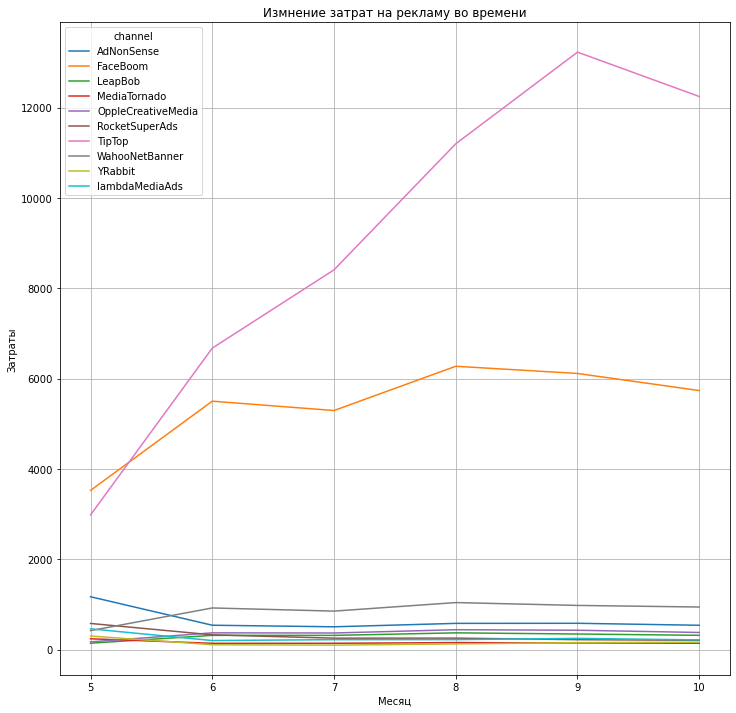

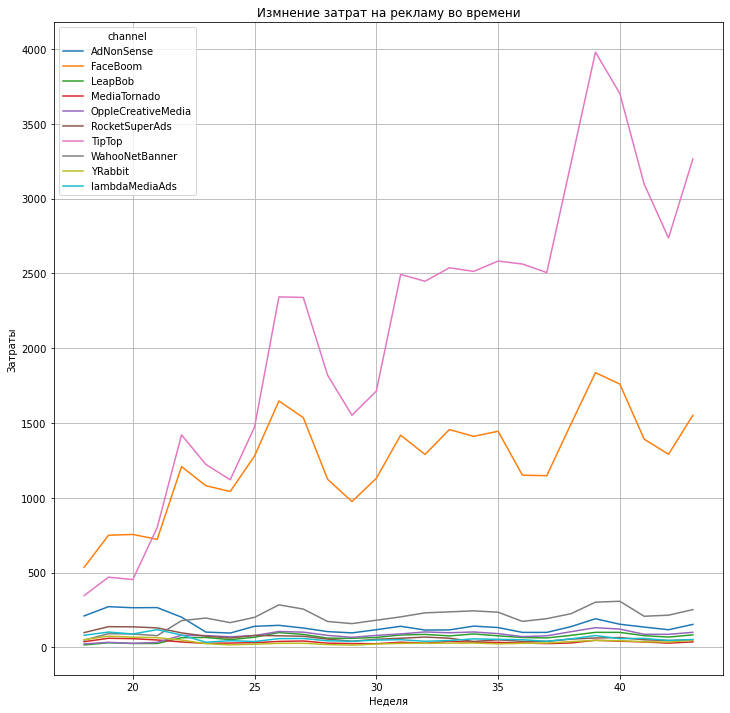

In [27]:
#создадим столбцы с месяцами и неделями
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

#построим график по месяцам
costs.pivot_table(index=['month'], columns='channel', values='costs', aggfunc='sum').plot(figsize=(12,12),grid=True)
plt.title('Измнение затрат на рекламу во времени')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()

#построим график по неделям
costs.pivot_table(index=['week'], columns='channel', values='costs', aggfunc='sum').plot(figsize=(12,12),grid=True)
plt.title('Измнение затрат на рекламу во времени')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()

**По графику видно, что тенденция затрат была задана либо в мае(18 неделя), либо раньше. Лидерами, как было выявлено на предыдущем этапе, являются TipTop и FaceBoom.**

In [28]:
# Рассмотрим CAC для каждого источника
profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**TipTop, FaceBoom, AdNonSense - самые дорогие тарифы.**

<div style="border:solid green 2px; padding: 20px">
    
        Одной из возможных причин убытков компании - большие вложения в рекламный 
    источник TipTop. Стоит сократить эти расходы. Стоит обратить внимание на такой 
    источник как AdNonSense. Процент платящих пользователей в него примерно равен 
    FaceBoom, это объясняет тот факт, что он в тройке дорогих тарифов (по CAC). 
    Предположительно, вложение в AdNonSense может быть выгодным.
    
</div>

____

### Оцените окупаемость рекламы

Чтобы оценить окупаемость рекламы будут использованы графики LTV, ROI и CAC. Будем считвть, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Органичных пользователей я решила оставить.

В ходе работы будут сделаны следующие пункты:
- Проанализирована окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверена конверсию пользователей и динамику её изменения. То же самое сделано с удержанием пользователей. Построены и изучены графики конверсии и удержания.
- Проанализирована окупаемость рекламы с разбивкой по устройствам. Построены графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализирована окупаемость рекламы с разбивкой по странам. Построены графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализирована окупаемость рекламы с разбивкой по рекламным каналам. Построены графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Даны ответы на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Исключаем органических пользователей, так как на них не были потрачены средства.

In [29]:
# исключаем органических пользователей
profiles = profiles.query('channel != "organic"')

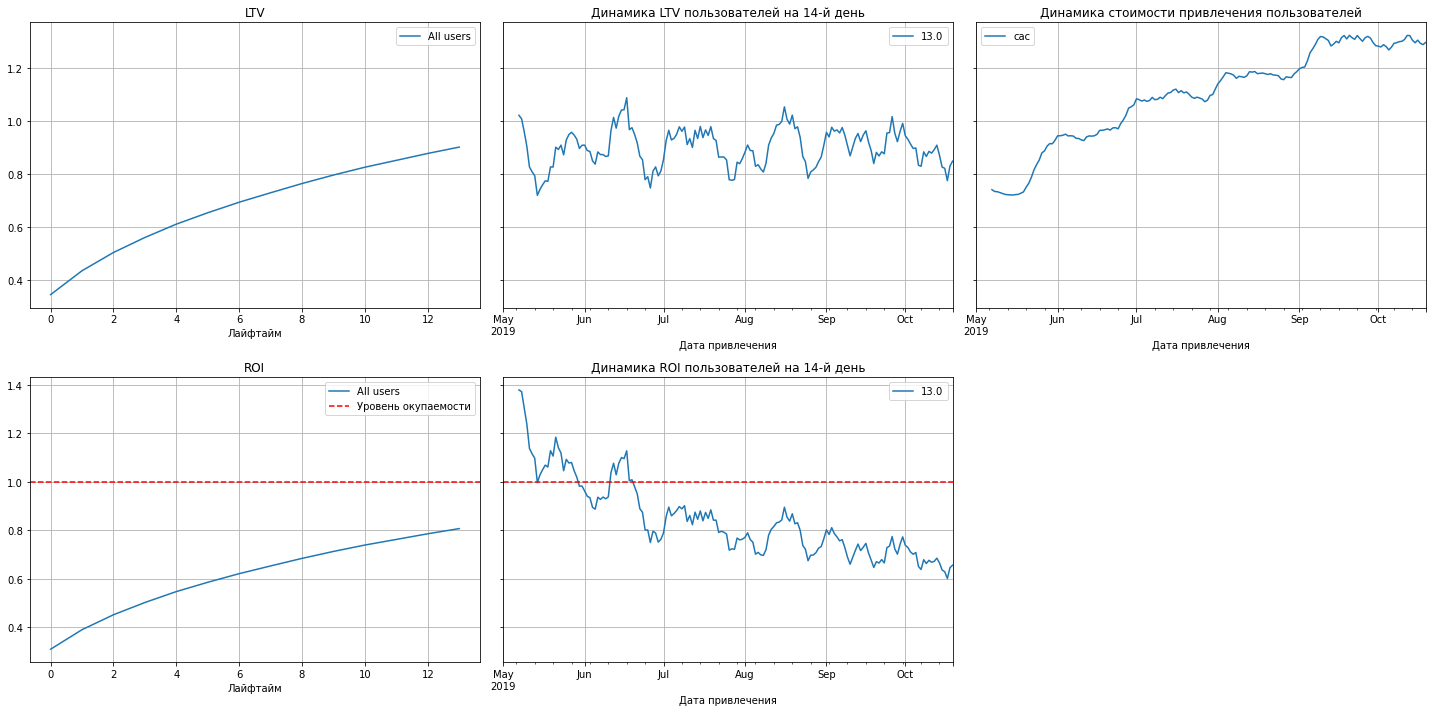

In [30]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**LTV держится примерно на одном уровне. CAC растёт. ROI не доходит до уровня окупаемости и после середины июня не окупается.**

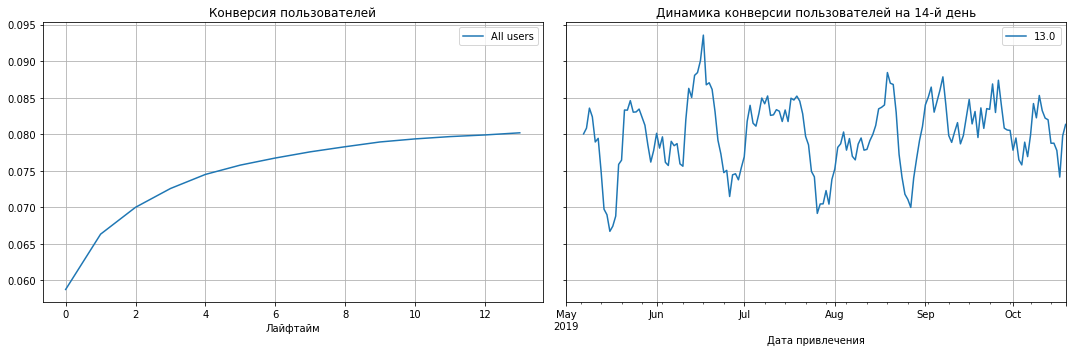

In [31]:
dimensions = []
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Перед июлем, августом и сентябрём есть кратковременные провалы в динамике. Это может свидетельствовать о технических ошибках. Возможно, стоит обратить внимание на наработку на отказ при отсутствии рестарта (учитывая, что провалы относительно циклычны проблемы могут быть в лагах в приложении) и наладить неполадки на разных девайсах.**

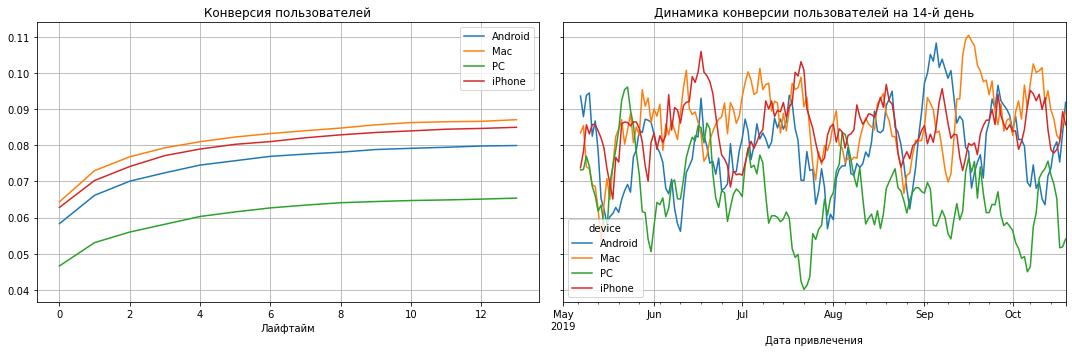

In [32]:
# рассмотрим теорию с девайсами
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**И правда, можно заметить, что на PC очень сильный провал. Стоит обратить на это внимание PC и исправить баги на данной девайсе.**

Теперь рассмотрим конверсию по каналам и по регионам.

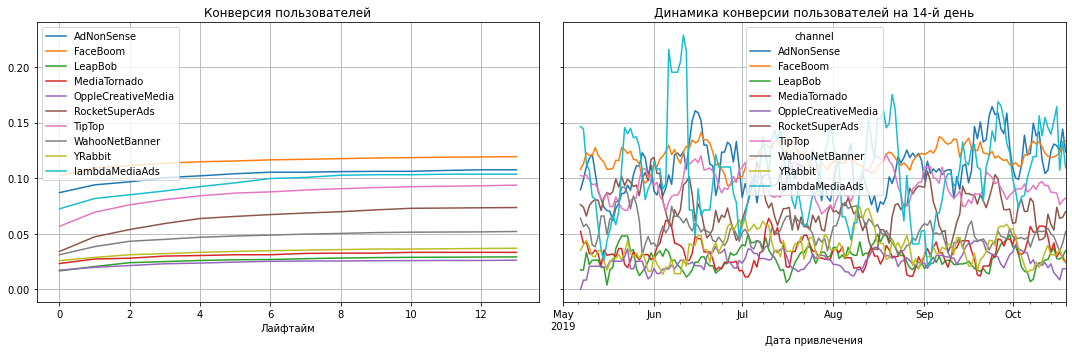

In [33]:
dimensions = ['channel']
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Конверсия у TipTop не самая высокая. Она ниже, чем CR у FaceBoom. Также можно заметить резкий "всплек" у lambdaMediaAds в июне. Значит пользователей что-то привлекло в этот период и они купили платную подписку.**

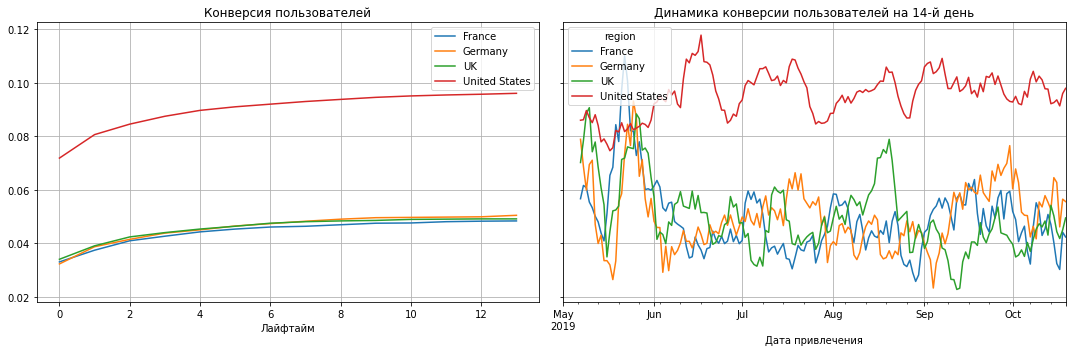

In [34]:
dimensions = ['region']
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Конверсия пользователей в США всегда была высокой и держалась примерно на 1 уровне. Конверсия в других странах относительно постоянна, однако после Июня упала.**

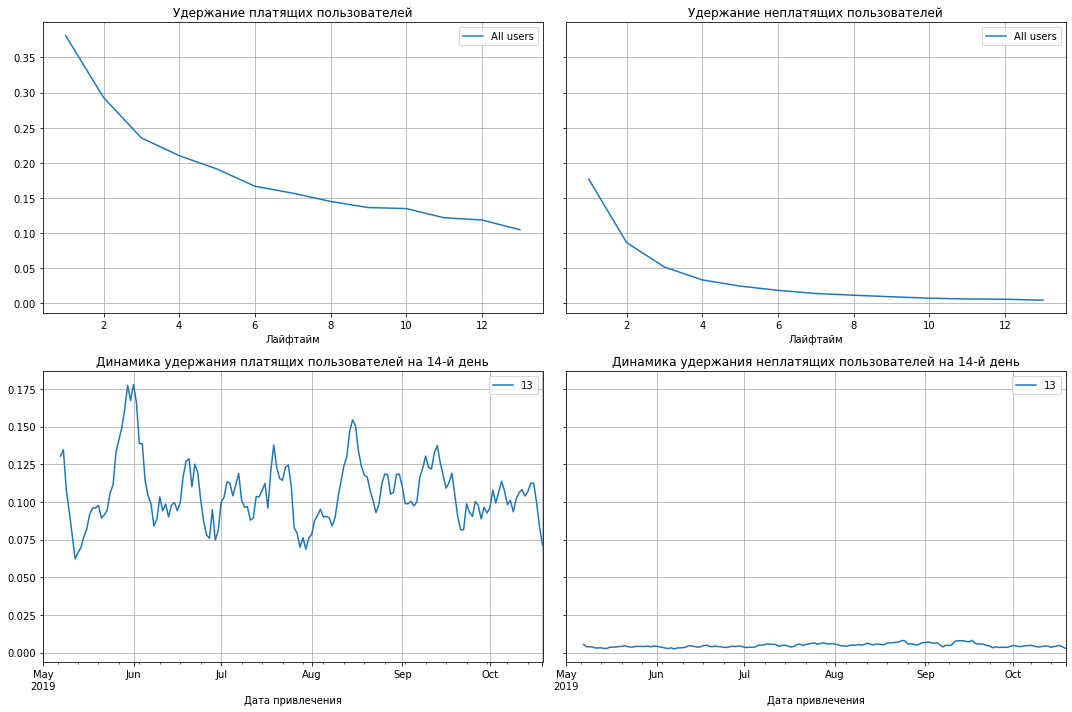

In [35]:
dimensions = []

# построим графики удержания пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**На данном этапе нельзя сделать определённых выводов. Так как проблема вызвана девайсами, стоит посмотреть удержание пользователей по девайсам. Так можно понять насклько рационально будет уделить приоритетное внимание устранения багов на РС.**

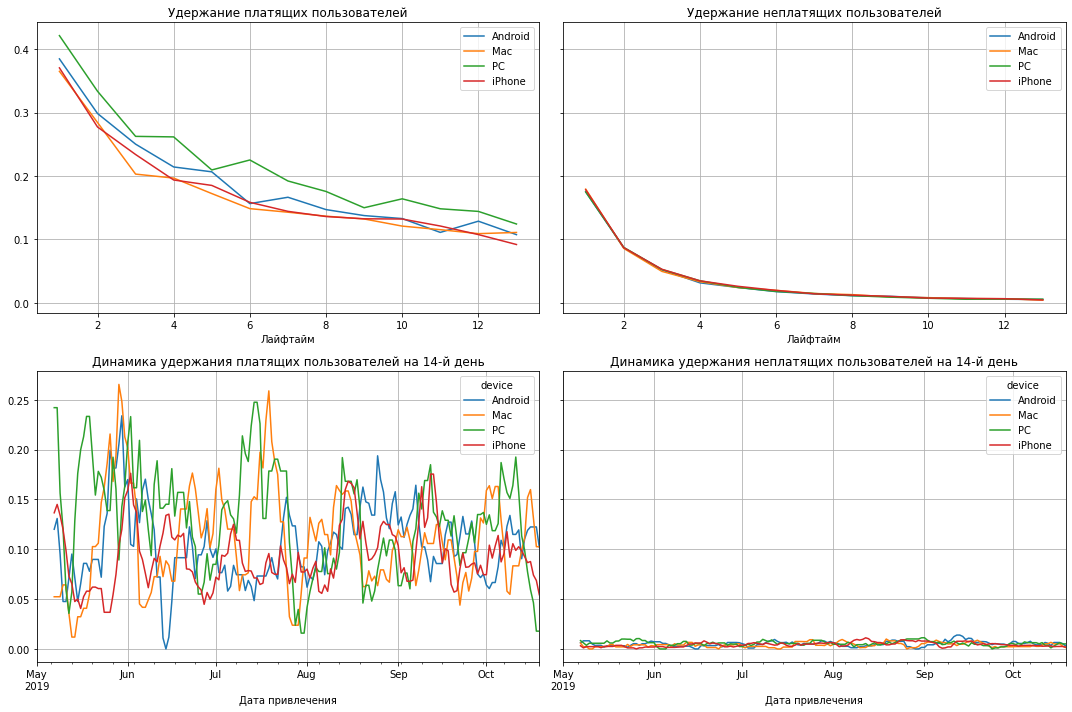

In [36]:
dimensions = ['device']

# построим графики удержания пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Удержание неплатящих пользователей не зависит от девайса, однако удержание на РС выше, чем на других девайсах. Значит и правда стоит уделить особое внимание техническим ошибкам на РС.**

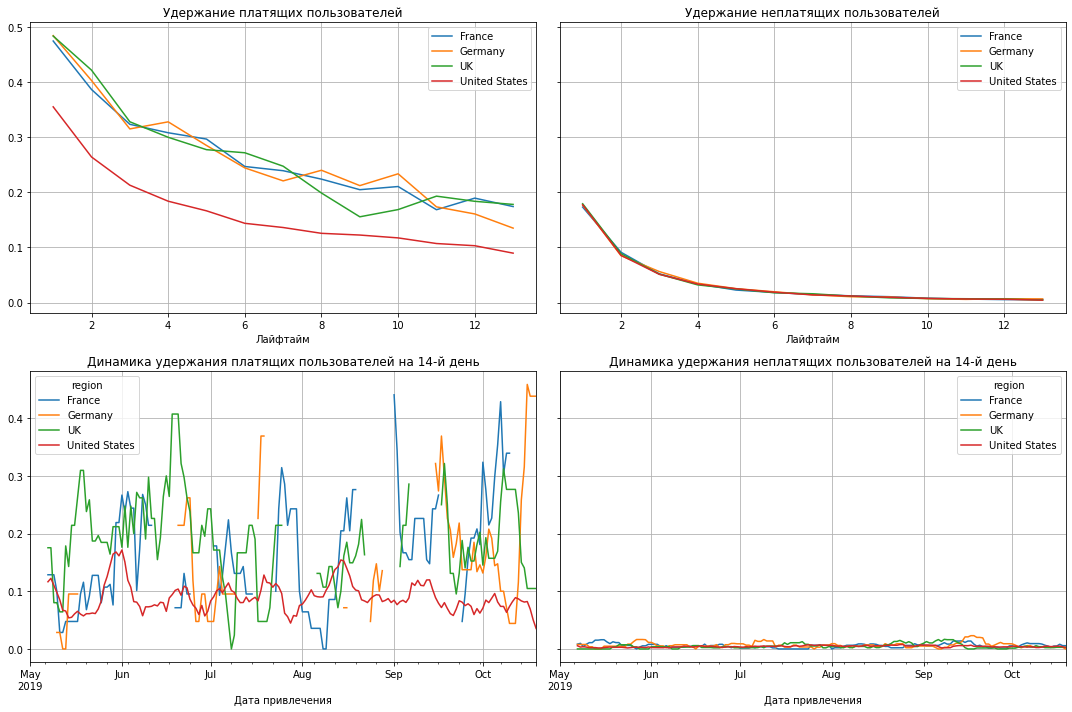

In [37]:
dimensions = ['region']

# построим графики удержания пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Динамика удержания платящих пользователей в Америке самая плохая, график динамики удержания у всех стран, кроме Америки прерывистый и не стабильный.**

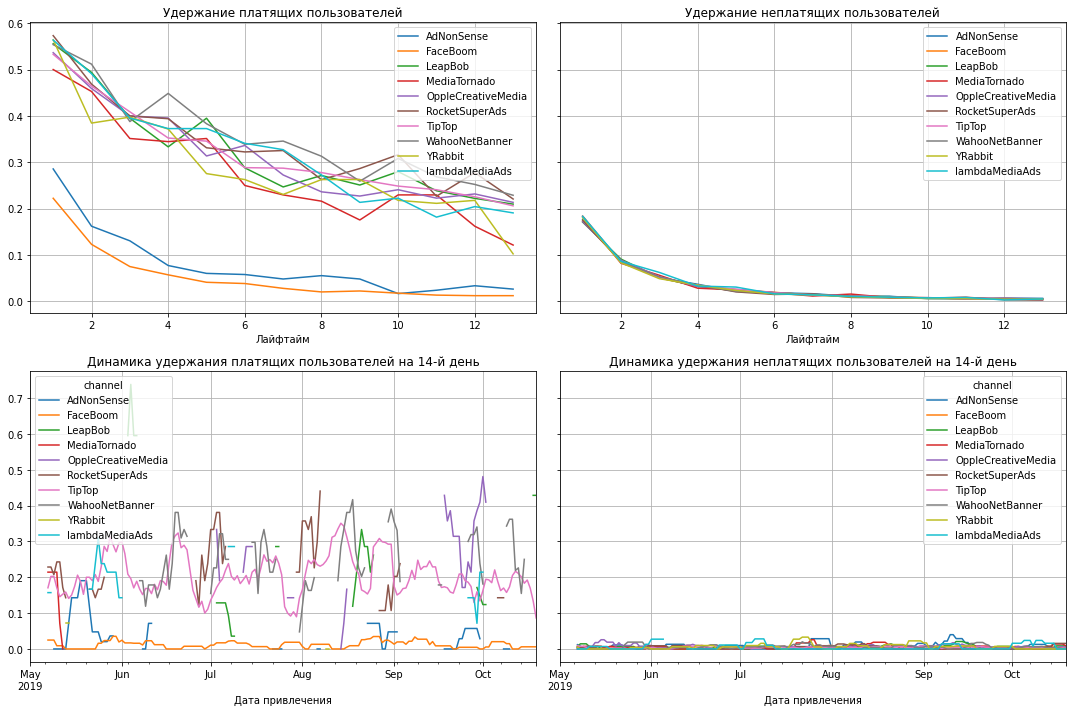

In [38]:
dimensions = ['channel']

# построим графики удержания пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Самое низкое удержание платящих пользователей у FaceBoom и AdNonSense.**

Теперь сделаем разбивки по устройствам,регионам и рекоамным каналам.

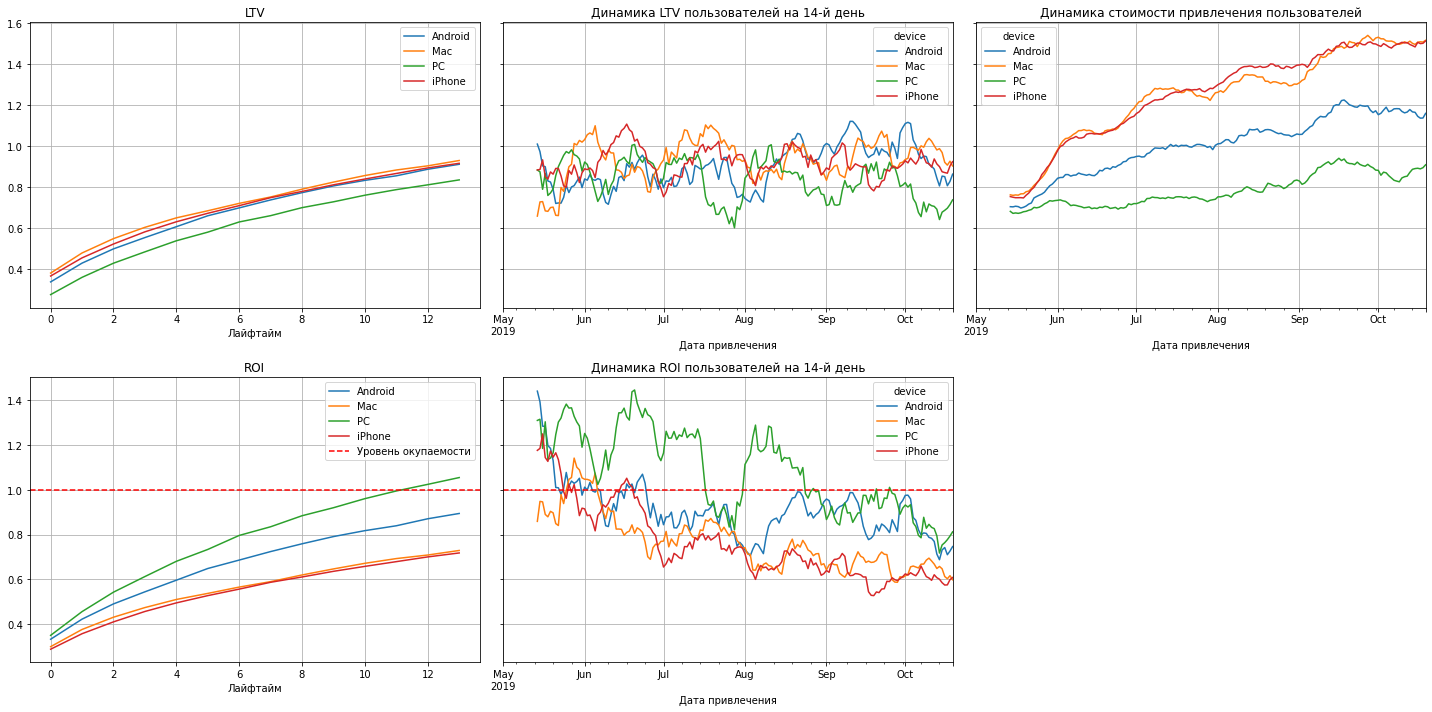

In [39]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Динамика стоимости на продукцию Apple растёт, но при этом затраты на реклам у не окупаются.**

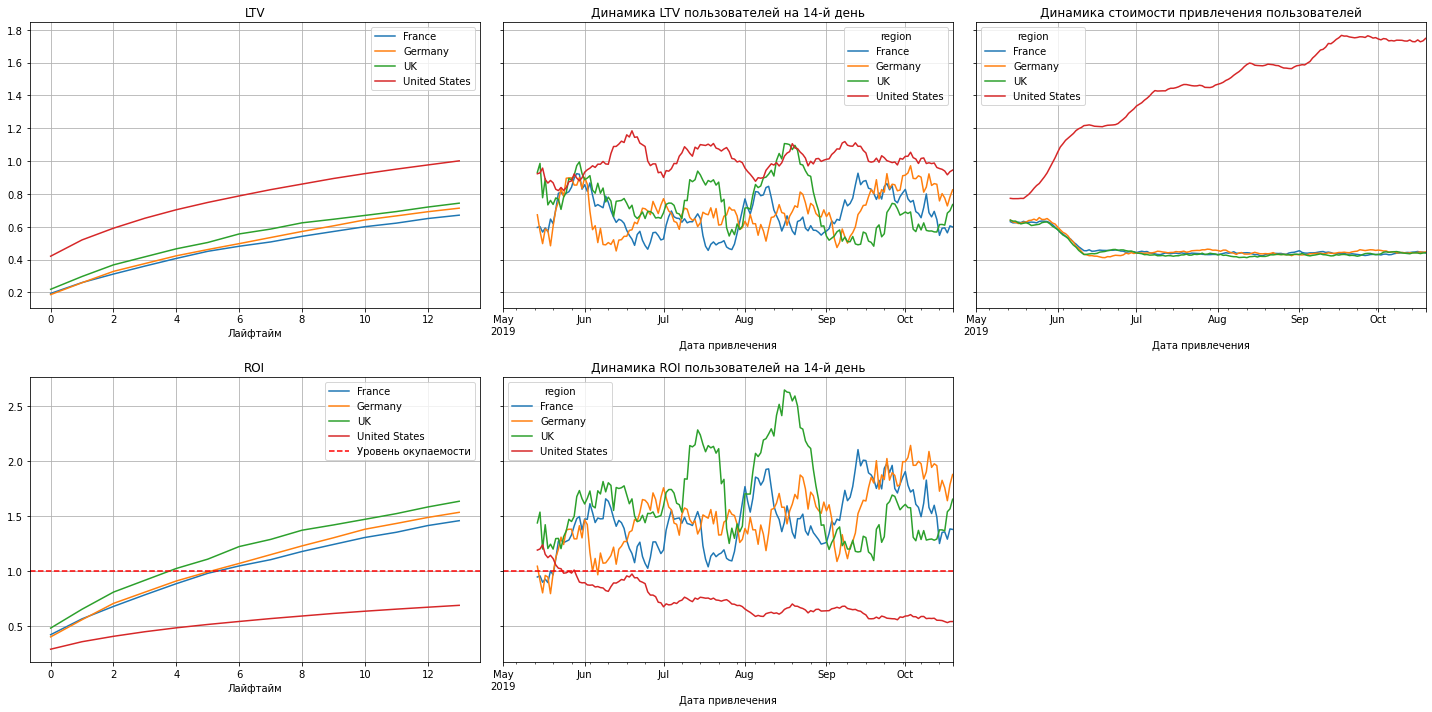

In [40]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Динамика стоимости привлечения пользователей в США начиная с июля сильно возрасла, при этом затраты на рекламу не окупаются. В остальных старах реклама окупается.**

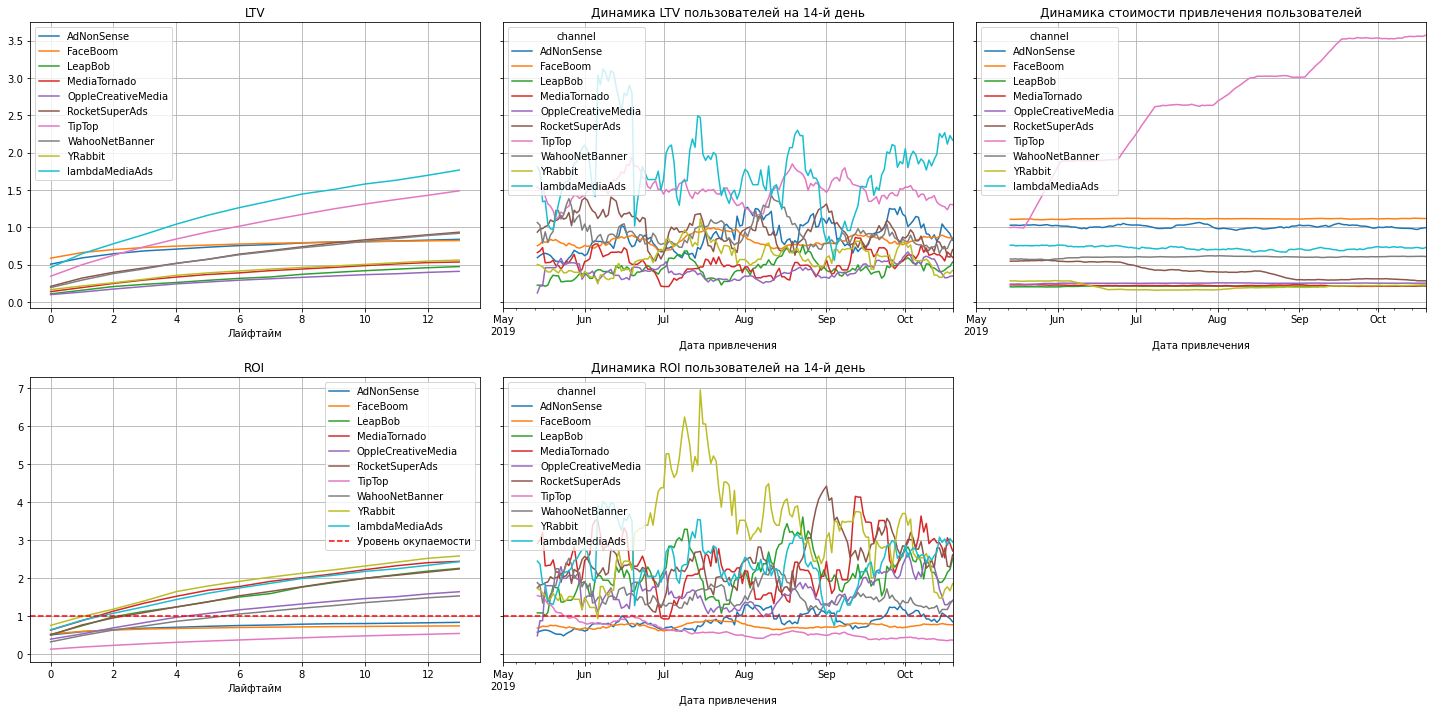

In [41]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**LTV у разных рекламных источников значительно отличаются. Динамика стоимости привлечения пользователей у TipTop сильно растёт и при этом реклама не окупается. Также реклама не окупается у FaceBoom, AdNonSense. На первый взгляд можно обратить внимание на такие каналы как YRabbit, так как у него самая большая окупаемость, однако в других показателях он не выделяется. Стоит рассмотреть такой канал как lambdaMediaAds, так как он в тройке по конверсии, у него достаточно большое удержание пользователей, окупаемость также на 3 месте.**

Самые невыгодные сложение это вложения в TipTop. Также реклама совсем не окупается в США. Стоит проверить, связано ли это. Так же проверим, связаны ли регионы и дивайсы, чтобы увидеть почему не окупаются пользователи Apple.

In [42]:
# построим таюлицу по каналам и регионам
profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


In [43]:
# построим таблицу по дивайсам и регионам
profiles.pivot_table(index='device', columns='region', values='user_id', aggfunc='count')

region,France,Germany,UK,United States
device,,,,
Android,3313,2849,3243,12436
Mac,1163,1020,1086,15424
PC,4384,3797,4551,6421
iPhone,2198,1862,2274,27548


**Все пользователи TipTop и FaceBoom из США. Очень много пользователей из США пользуются Mac или iPhone.**

<div style="border:solid green 2px; padding: 20px">
    
    1. Реклама, направленная на привлечение пользователей не окупается
    2. Как было упомянуто в предыдущих пунктах, в TipTop вкладывают слишком много 
    средств, при этом реклама не окупается. Также необходимо обратить внимание на 
    провалы в конверсии для пользователей РС. Необходимо устранить технические ошибки. 
    Говоря о  странах, USA значительно снижает окупаемость в общем.
    3. Проблема окупаемости могут быть вызваны ежемесячными ошибками в работе приложения 
    для РС, неправильным распределением средств на рекламу (TipTop - не выгодное 
    вложение, так как реклама не окупается).
    4. Стоит обратить внимание на канал lambdaMediaAds.
    
</div>

### Заключение. Итоговый вывод

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Причины неэффективности рекламы:**


<div style="border:solid green 2px; padding: 20px">
    
    1. Основными причинами являются вложение средств в каналы, реклама которых 
    не окупается, а именно: AdNonSense, FaceBoom, TipTop. Основными пользователями 
    FaceBoom и TipTop являются жители США, ROI которых не окупается.
    2. Возможно, в США в июле произошло какое-то событие, которое повлекло неокупаемость ROI. 
    3. Пользователи продукции Apple не окупаются, так как они тоже в основном из США. 
    4. Очень странно, что именно в 2019 году в США появилось много неплатящих 
    пользователей. Возможно, такая динамика - последствие использования VPN 
    в различных странах. 
    5. FaceBoom может не окупаться из-за того, что пользователей не интересует тематика 
    Procrastinate Pro+. 
    
</div>

**Рекомандации для отдела маркетинга:**

<div style="border:solid green 2px; padding: 20px">
    
    1. Пользователи из Англии (UK) и Германии (Germany), поэтому стоит подумать над
    рекламными канами (привлечением пользователей) для этих стран.
    2. Также стоит обратить внимание на пользователей РС и Android, так как эти 
    пользователи хорошо удерживаются.
    3. YRabbit, MediaTornado, lambdaMediaAds - каналы с самой большой окупаемостью. 
    Стоит вместо TipTop вкладываться в них.
    4. Самый высокий LTV у канала lambdaMediaAds, также он в тройке по конверсии, у 
    него достаточно большое удержание пользователей, окупаемость также на 3 месте. 
    Поэтому приоритет можно отдать этому каналу.
    
</div>